In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import pickle as pkl
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### chargement de données

In [2]:
#X_train, X_test, y_train, y_test = joblib.load("data_split.pkl")

In [10]:
y_train = joblib.load("y_train.joblib")

In [11]:
X_train = joblib.load("X_train.joblib")

In [12]:
X_test = joblib.load("X_test.joblib")

In [13]:
y_test = joblib.load("y_test.joblib")

### gridsearch for LogisticRegression

In [10]:
# 解説5：グリッドサーチを設定する---------------------------------------------------
#clf=SVC(class_weight='balanced', random_state=42)
clf = LogisticRegression(warm_start=True, random_state=42)

C =[0.001,0.01,0.1] #変化させるパラメータに設定する値たち
hyper_param_grid=[{'C':C,
                   'class_weight':['balanced']}] #Cとカーネルとgammaを変化させて最適化させる

clf_grid_search = GridSearchCV(
    estimator = clf, 
    param_grid = hyper_param_grid, 
    cv=3,     
    return_train_score=True,
    n_jobs=2,
    verbose=2)

clf_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


C:\Users\nante\anaconda3\envs\simplon\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=3,
             estimator=LogisticRegression(random_state=42, warm_start=True),
             n_jobs=2,
             param_grid=[{'C': [0.001, 0.01, 0.1],
                          'class_weight': ['balanced']}],
             return_train_score=True, verbose=2)

In [11]:
results=pd.DataFrame(clf_grid_search.cv_results_)
results.T

,0,1,2
mean_fit_time,17.142373,26.205111,38.547822
std_fit_time,2.0992,3.59733,10.700152
mean_score_time,1.092917,0.743707,0.541464
std_score_time,0.216433,0.188461,0.208173
param_C,0.001,0.01,0.1
param_class_weight,balanced,balanced,balanced
params,"{'C': 0.001, 'class_weight': 'balanced'}","{'C': 0.01, 'class_weight': 'balanced'}","{'C': 0.1, 'class_weight': 'balanced'}"
split0_test_score,0.841013,0.87437,0.883129
split1_test_score,0.846754,0.872915,0.882635
split2_test_score,0.845914,0.875435,0.882515


In [12]:
# to see the best hyperparameters

clf_grid_search.best_params_

{'C': 0.1, 'class_weight': 'balanced'}

In [13]:
# to see the best validation score
clf_grid_search.best_score_

0.882759985225423

In [14]:
# to see the best hyperparameters
clf_LR = clf_grid_search.best_estimator_
clf_LR

LogisticRegression(C=0.1, class_weight='balanced', random_state=42,
                   warm_start=True)

modèle avec best hyperparameters est over fitting

    train score(accuracy): 1.0
    validation score(accuracy) : 0.8833599516286866

donc c'est mieux de prendre le modèle avec test_rank_score=3
    
    train score(accuracy): 0.9078
    validation score(accuracy) : 0.87424
    train score(accuracy) - validation score(accuracy) = 0.034

LogisticRegression(C=0.01, class_weight='balanced', random_state=42, warm_start=True)


### Focus sur le meilleur modele

In [14]:
clf_lr_best = LogisticRegression(C=0.01, class_weight='balanced', random_state=42, warm_start=True)

In [15]:
clf_lr_best.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight='balanced', random_state=42,
                   warm_start=True)

### save the best model avec joblib

In [16]:
%%time
# 構築したモデルの保存
filename = 'clf_lr_best.pkl'
joblib.dump(clf_lr_best,filename)

Wall time: 28.7 ms


['clf_lr_best.pkl']

#### matrix de confusion

In [18]:
y_train_pred = clf_lr_best.predict(X_train)

In [19]:
#création de matrix de confusion
cm_train = confusion_matrix(y_train, y_train_pred)

In [20]:
cm_train

array([[11241,  1259],
       [ 1018, 11482]], dtype=int64)

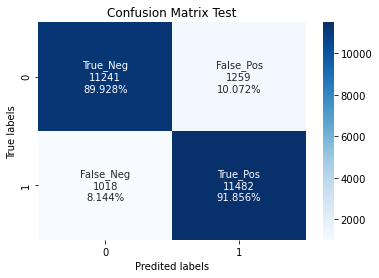

In [25]:
#pour RAJOUTER les labels et les pourcentages sur le graphique, passer par seaborn
#fig = plt.figure(figsize=(15, 7), dpi=100)
ax= plt.subplot()

group_names = ['True_Neg','False_Pos','False_Neg','True_Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm_train.flatten()]
group_percentages1 = ["{0:.3%}".format(value) for value in cm_train.flatten()[0:2]/np.sum(cm_train.flatten()[0:2])]
group_percentages2 = ["{0:.3%}".format(value) for value in cm_train.flatten()[2:]/np.sum(cm_train.flatten()[2:])]
group_percentages = np.append(group_percentages1, group_percentages2).tolist()
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip (group_names, group_counts, group_percentages)]
labels = np.array(labels).reshape(2,2)

sns.heatmap(cm_train, annot=labels, fmt='', cmap='Blues')

ax.set_xlabel('Predited labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix Test') 

plt.show()

https://www.salesanalytics.co.jp/datascience/datascience044/